# GDP Analysis

**Project Objective**

The goal of the project is to help the CMs focus on areas that will foster economic development for their respective states. Since the most common measure of economic development is the GDP,need to analyse the GDP of the various states of India and suggest ways to improve it.

**Overview of Data**

The data is sourced from https://data.gov.in/, an Open Government Data (OGD) platform of India. The data for GDP analysis of the Indian states is divided into two parts:

- **Data I-A:** This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.


- **Data I-B:** This dataset contains the distribution of GSDP among three sectors: the primary sector (agriculture), the        -               secondary sector (industry) and the tertiary sector (services) along with taxes and subsidies. There is  separate dataset for each of the states.


- **Data II:** This dataset contains the dropout rate of the education of all states.

## Part I: GDP Analysis of the Indian States



**`Note:`** 
- **`All the datasets are read from this notebook containing folder and the path of the file needs to be handled accordingly`**
- **`Inplace=True is not used on any function, please run the whole notebook`**


### Part I-A

In [1]:
#Importing libraries required for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from textwrap import wrap
%matplotlib inline

#setting pandas display capacity
pd.set_option('display.max_columns',999)



In [2]:
# Read the dataset Data I-A

df=pd.read_csv("ab40c054-5031-4376-b52e-9813e776f65e.csv")

#Explore the dataset
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
#Check the shape and info of the dataset
print(df.shape)
print('\n')
print(df.info())

(11, 36)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya         

In [4]:
# Observe the summary of all columns of the dataframe

df.describe(include='all')

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11,11,11.000000,9.000000,9.000000,9.000000,11.000000,9.000000,9.000000,11.000000,7.000000,9.000000,9.000000,9.000000e+00,9.000000,11.000000,7.000000e+00,7.000000,11.000000,7.000000,7.000000,11.000000,7.000000,7.000000,9.000000,1.100000e+01,11.000000,7.000000,9.000000e+00,9.000000,0.0,7.000000,9.000000,11.000000,11.000000,1.100000e+01
unique,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GSDP - CURRENT PRICES (` in Crore),2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,280986.561818,8201.516667,100018.167778,181565.673333,120748.879091,22450.120000,448568.674444,228667.271818,50673.064286,53343.001111,108146.807778,4.513641e+05,261754.667778,254612.666364,8.801568e+05,8705.667143,13226.292727,5360.514286,8647.408571,165523.518182,181017.291429,298914.260000,7694.774444,5.656468e+05,268570.787273,13739.691429,5.209237e+05,82588.947778,NaN,2759.814286,13707.002222,258693.004545,12527.435455,6.479952e+06
std,NaN,NaN,282573.532407,8073.276061,97589.497456,178700.497677,120928.480448,21443.429799,438025.627165,228195.895576,48384.121107,51712.668467,105639.905009,4.448216e+05,256167.685132,257221.114122,8.388230e+05,8298.692552,12892.762628,5180.533709,8338.966000,163258.568904,172158.243521,284618.513069,7451.983166,5.636158e+05,268734.549079,13240.797263,5.087288e+05,80553.858327,NaN,2627.016700,13399.003286,258176.516280,12445.889343,6.433000e+06
min,NaN,NaN,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.820000,9.180000,10.140000,4.700000,7.920000,1.142000e+01,11.850000,10.110000,8.780000e+00,6.450000,4.870000,12.300000,10.850000,6.190000,9.950000,11.270000,9.390000,1.040000e+01,11.700000,12.780000,1.051000e+01,8.120000,NaN,10.890000,8.840000,10.960000,10.140000,9.990000e+00
25%,NaN,NaN,14.025000,14.790000,13.190000,14.250000,12.995000,10.750000,11.470000,14.135000,14.155000,11.310000,15.140000,1.456000e+01,13.110000,16.325000,1.376500e+01,14.610000,9.695000,19.150000,18.505000,11.900000,12.045000,12.275000,10.510000,1.301000e+01,12.840000,17.030000,1.365000e+01,13.650000,NaN,13.905000,14.710000,13.095000,11.815000,1.224500e+01
50%,NaN,NaN,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,150918.000000,6.037780e+05,364048.000000,315561.000000,1.272967e+06,12915.000000,19918.000000,7259.000000,11839.000000,227872.000000,266628.000000,436465.000000,11165.000000,7.514850e+05,359433.000000,19208.000000,7.240490e+05,115523.000000,NaN,3979.000000,18768.000000,343767.000000,16818.000000,8.736039e+06
75%,NaN,NaN,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,188567.000000,8.178860e+05,465041.000000,459859.500000,1.547986e+06,14973.000000,23673.000000,9327.500000,15115.500000,306840.000000,316224.000000,521852.500000,13862.000000,1.031827e+06,481682.000000,23628.000000,9.441460e+05,149817.000000,NaN,4790.000000,24787.000000,468103.500000,22979.500000,1.183519e+07



It is observed that the year 2016-17 contains maximum missing values. Let's skip that year.


In [5]:
#Dropping the rows of the year 2016-17 and getting rid of all missing value columns 
df=df[df.Duration!='2016-17']
df=df.reindex()
df=df.dropna(axis=1,how='all')

In [6]:
#Combining two columns for ease of handling
df["Items  Description"]=df["Items  Description"] + " for " + df["Duration"]
df=df.drop(["Duration"],axis=1)


In [7]:
#Setting new index
df=df.set_index("Items  Description")

In [8]:
#Subset the dataframe to get only required columns and transposing the dataframe
df1=df.iloc[6:,:]
df1=df1.T

In [9]:
#Finding mean of all rows to get average growth over 3 years for every state
df1["Average %Growth"]=df1.mean(axis=1)

In [10]:
#Sorting the % in decreasing order and exploring the newly generated dataframe
df1=df1.sort_values(by=["Average %Growth"],ascending=False)
df1.head()

Items Description,(% Growth over previous year) for 2013-14,(% Growth over previous year) for 2014-15,(% Growth over previous year) for 2015-16,Average %Growth
Mizoram,23.10,12.30,NaN,17.700000
Tripura,18.14,15.92,NaN,17.030000
Nagaland,21.98,10.85,NaN,16.415000
Manipur,17.83,11.39,NaN,14.610000
Arunachal Pradesh,16.38,14.79,12.07,14.413333


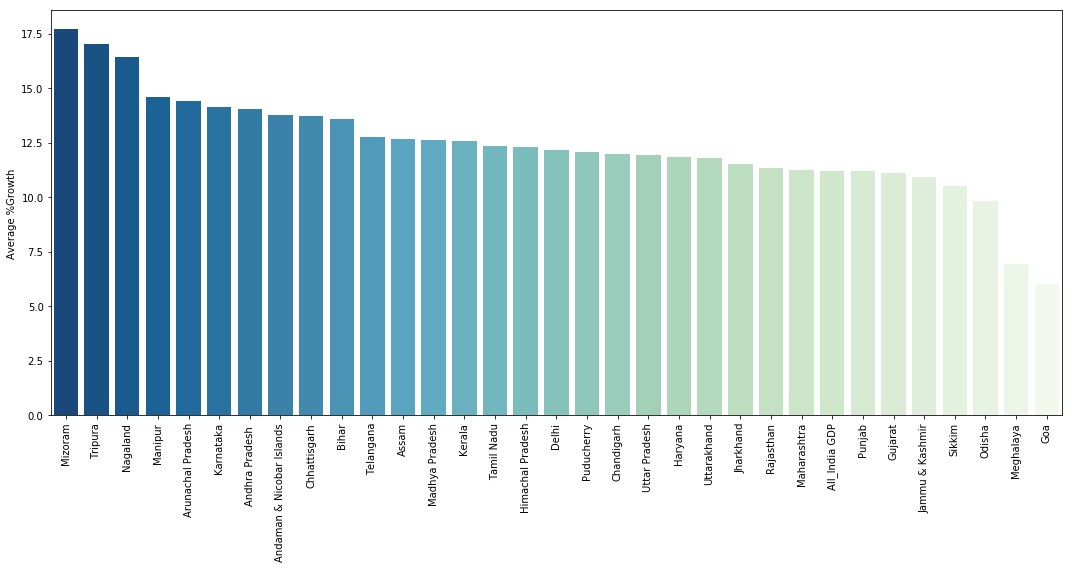

In [11]:
#Getting the bar plot of Average %Growth over each state
plt.figure(figsize=(15,8))
sns.barplot(x=df1.index,y="Average %Growth",data=df1,palette="GnBu_r")
x=plt.xticks(rotation=90)
plt.tight_layout()

From the above plot, states like Mizoram,Tripura, Nagaland and Manipur accidentally the neighbouring States in the North-East region of India have shown about **`17% increase`** in the GSDP in three years and also proven to be growing consistently fast.

We can also see that states such as Goa and  Meghalaya are lagging at last with only **`6%`** growth.

**`Maharashtra`** my home state has short stick with **`11.26% increase`** and matches with the national average having **`11.20%`** 



In [12]:
#Getting GSDP column of the year 2015-16 in new dataframe and sorting in descending order
df2=df.T
df2=df2.iloc[:,4]
df2=df2.sort_values(ascending=False)

Text(0.5, 1.0, 'GSDP of the States for 2015-16')

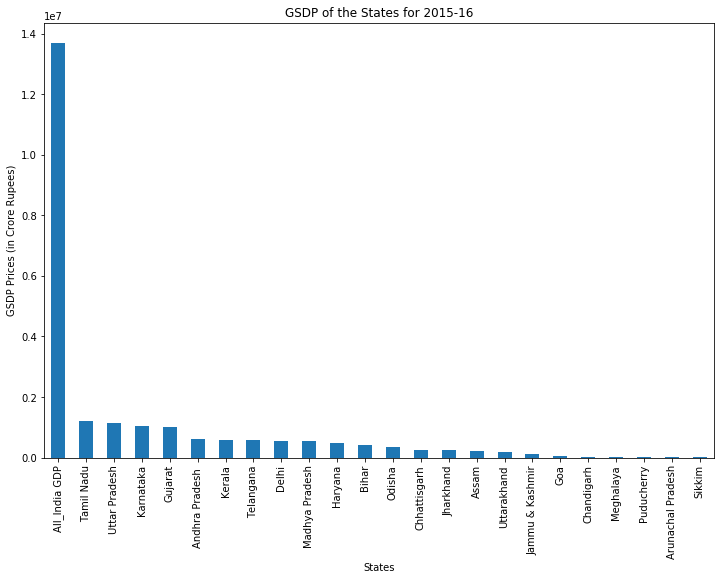

In [13]:
#Plotting the current prices GSDP of 2015-16 along the states by removing states with missing values  
plt.figure(figsize=(12,8))
df2=df2.dropna()
df2.plot.bar()
plt.xlabel("States")
plt.ylabel("GSDP Prices (in Crore Rupees)")
plt.title("GSDP of the States for 2015-16")


**`Tamil Nadu,Uttar Pradesh,Karnataka,Gujarat and Andhra Pradesh`** are the `top` states with the highest GSDP for the year 2015-16 whereas **`Sikkim,Aruanchal Pradesh,Puducherry,Meghalaya and Chandigarh`** comprising 3 states and 2 union territories have contributed very less to the total GDP of India for the same year.

### Part I-B

Let's start with Part I-B analysis. Here we are considering the GDP data of the States only for the duration __2014-2015__.

In [14]:
#We have already imported all the libraries required in the previous part.
#Importing the csv files of all the States and Union Territories from the folder using glob library

#Path used here confers that the folder is present in this file directory. Use the same path or change it accordingly
filespath="Statewise"
#Reading all paths
filesdata=glob.glob(os.path.join(filespath,"*.csv"))

#Creating an empty list to store all the datframes
li=[]

#Looping over the file paths for accessing it individually
for files in filesdata:
    gdp=pd.read_csv(files,header=0,encoding='unicode_escape',index_col=None)  #Reading the file
    #Selecting required columns
    gdp=gdp[['Item','2014-15']] 
    #Transposing the dataframe
    gdp=gdp.T 
    #Taking the header row
    new_header=gdp.iloc[0] 
    #Subsetting without the header row
    gdp=gdp[1:]
    #Assigning new header
    gdp.columns=new_header
    #Creating the State column by splitting file paths
    gdp['State']=files.split('\\')[-1].split('.')[0].split('-')[-3]
    #Adding all the data to the list
    li.append(gdp)

#Forming the final Dataframe by joining the list
gdp=pd.concat(li,axis=0,ignore_index=True,sort=False)
gdp.head()#Now, let's explore the dataframe

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,10488884,4233400,3716000,517400,5076984,424228,2816000,94200,14900,780200,18700,928756,1900863,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977,Andhra_Pradesh,NaN,NaN,NaN,NaN
1,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,287489,60421,56796,3625,35203,59,15467,0,0,109,0,19568,25207,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718,Arunachal_Pradesh,NaN,NaN,NaN,NaN
2,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,4033091,2987155,2876251,110904,1194568,252509,507668,4502,26223,35739,10308,357619,543651,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN
3,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,5984896,7448373,7081391,366982,3147173,462413,1572288,2228,13599,166600,10618,919427,1178022,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN
4,16233,1659,13992,388,194,179,16412,149631,29741,133321,312693,965781,890921,74860,148302,1070,54468,0,12391,33211,763,46399,373045,598448,183889,156543,2426008,2755113,52622,23309,2784426,11120,250398,Chandigarh,NaN,NaN,NaN,NaN


In [15]:
#Getting the shape and primary information of the dataframe
print(gdp.shape)
print('\n')
print(gdp.info())

(31, 38)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 38 columns):
Agriculture, forestry and fishing                                       31 non-null object
Crops                                                                   31 non-null object
Livestock                                                               31 non-null object
Forestry and logging                                                    31 non-null object
Fishing and aquaculture                                                 31 non-null object
Mining and quarrying                                                    30 non-null object
Primary                                                                 31 non-null object
Manufacturing                                                           31 non-null object
Electricity, gas, water supply & other utility services                 31 non-null object
Construction                                                       

In [16]:
#Getting more details
gdp.describe(include='all')

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
count,31.0,31.0,31.0,31.0,31.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,30.0,29.0,31.0,31.0,27.0,25,28.0,27.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31,3.0,1,1,1.0
unique,31.0,31.0,31.0,31.0,31.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,30.0,29.0,31.0,30.0,27.0,15,26.0,25.0,28.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31,3.0,1,1,1.0
top,16235647.0,64959.0,30141.0,352254.0,704319.0,2117218.0,225598.0,149631.0,3409983.0,165819.0,6241471.0,1991359.0,64624.0,121407.0,1470022.0,0.0,928575.0,0,0.0,0.0,0.0,19568.0,1900863.0,159651.0,2008191.0,4164287.0,45968959.0,19623166.0,2601791.0,1332092.0,21710718.0,20550.0,73979.0,Goa,2744163.0,7763847,2761427,307147.0
freq,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,11,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1,1,1.0


In [17]:
#Some columns are duplicated with asterik sign(*) at the end
#Popping out the sign and grouping the dataframe on all columns to form unique columns across
gdp.columns=gdp.columns.str.rstrip("*")
gdp=gdp.groupby(lambda x:x, axis=1,sort=False).sum()

#Grouping converts the missing values to zero so converting back to missing values for obtaining proper results 
gdp=gdp.replace({'0.0':np.nan, 0:np.nan})

In [18]:
#Removing the '_' sign from the column strings for proper readability
gdp['State']=gdp['State'].str.replace('_',' ')

#Filtering out the Union Territories from the dataframe and again visualising the dataframe
UT_list=['Chandigarh','Puducherry','Delhi','Jammu Kashmir','Andaman & Nicobar Islands','Daman and Diu','Dadra and Nagar Haveli','Lakshadweep']
gdp=gdp[~gdp['State'].isin(UT_list)]
gdp.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State
0,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,10488884.0,4233400.0,3716000.0,517400.0,5076984.0,424228.0,2816000.0,94200.0,14900.0,780200.0,18700.0,928756.0,1900863.0,4405409.0,2200897.0,4215389.0,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0,Andhra Pradesh
1,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,287489.0,60421.0,56796.0,3625.0,35203.0,59.0,15467.0,NaN,NaN,109.0,NaN,19568.0,25207.0,48418.0,243867.0,218728.0,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0,Arunachal Pradesh
2,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,4033091.0,2987155.0,2876251.0,110904.0,1194568.0,252509.0,507668.0,4502.0,26223.0,35739.0,10308.0,357619.0,543651.0,1412466.0,1373611.0,1795658.0,9307109.0,18666897.0,1725309.0,582406.0,19809800.0,326780.0,60621.0,Assam
3,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,5984896.0,7448373.0,7081391.0,366982.0,3147173.0,462413.0,1572288.0,2228.0,13599.0,166600.0,10618.0,919427.0,1178022.0,3740641.0,2078171.0,4587589.0,22179969.0,36184863.0,3213546.0,2006421.0,37391988.0,1101240.0,33954.0,Bihar
5,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,8238886.0,1535571.0,1414164.0,121407.0,871770.0,159176.0,386628.0,NaN,9507.0,5232.0,16675.0,294552.0,739057.0,2462166.0,867982.0,1112232.0,7588778.0,22228481.0,2601791.0,1332092.0,23498180.0,270530.0,86860.0,Chhattisgarh


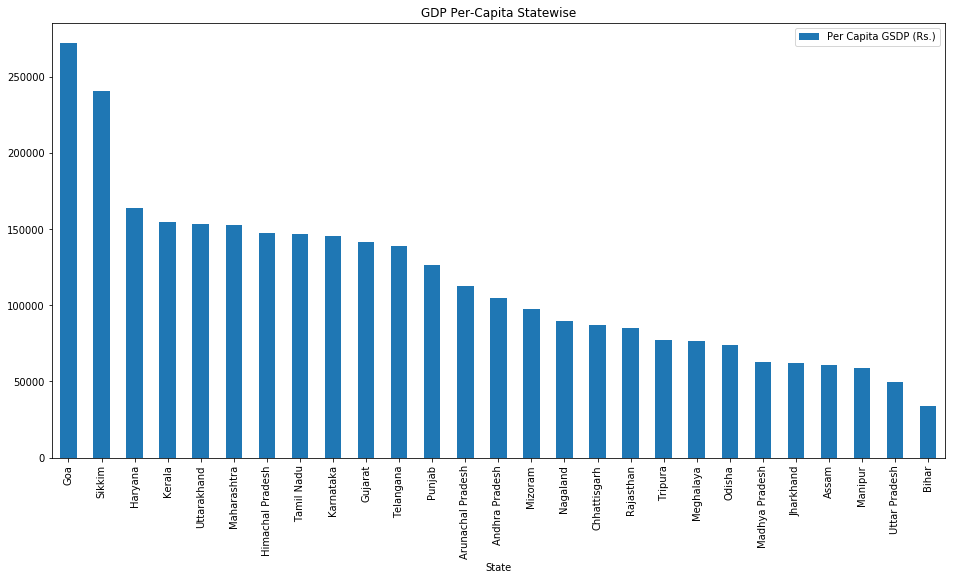

In [19]:
#Plotting the Per capita GDP for all the states in decreasing order

gdp=gdp.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
x=gdp.plot(x='State',y='Per Capita GSDP (Rs.)',kind='bar',figsize=(16,8),title='GDP Per-Capita Statewise')


**Highest Per Capita GDP States :-**                                    

- Goa                                            
- Sikkim                                         
- Haryana                                        
- Kerala                                         
- Uttarakhand                                    

**Lowest Per Capita GDP States :-**

- Bihar
- Uttar Pradesh
- Manipur
- Assam
- Jharkhand

In [20]:
#The output shows the ratio of the highest GDP State to the lowest GDP State
(gdp['Per Capita GSDP (Rs.)'].max()/gdp['Per Capita GSDP (Rs.)'].min()).round()

8.0

In [21]:
#Calculating sectorwise contibution to the GSDP in percentages
gdp=gdp.set_index('State')
gdp=gdp.sort_values(by='Gross State Domestic Product',ascending=False)
gdp['Primary %Contribution']=(gdp['Primary']/gdp['Gross State Domestic Product'])*100
gdp['Secondary %Contribution']=(gdp['Secondary']/gdp['Gross State Domestic Product'])*100
gdp['Tertiary %Contribution']=(gdp['Tertiary']/gdp['Gross State Domestic Product'])*100
gdp.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary %Contribution,Secondary %Contribution,Tertiary %Contribution
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maharashtra,16475655.0,10435121.0,3972829.0,1592564.0,475141.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,47445207.0,15839100.0,14286902.0,1552198.0,9697246.0,797933.0,4644123.0,223626.0,174188.0,1175023.0,131237.0,2551115.0,16143324.0,30718051.0,5426991.0,10806363.0,88631076.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0,12.141131,26.474323,49.455948
Tamil Nadu,13064238.0,7297820.0,4693361.0,392705.0,680352.0,265536.0,13329774.0,18914794.0,1710379.0,12216718.0,32841892.0,12895842.0,11252588.0,1643253.0,7188320.0,468553.0,3660994.0,70414.0,180836.0,864407.0,39834.0,1903283.0,5598498.0,16830213.0,3400800.0,7430115.0,53343788.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0,12.200454,30.059475,48.824418
Uttar Pradesh,25097754.0,16215212.0,7096876.0,1404936.0,380730.0,901501.0,25999255.0,12261649.0,2030625.0,11256450.0,25548724.0,9437243.0,8476139.0,961104.0,7404509.0,1618742.0,3645747.0,681.0,36582.0,16323.0,171696.0,1914737.0,3392275.0,14548185.0,6152124.0,5034623.0,45968959.0,97516938.0,10107396.00,3287219.0,104337115.0,2109940.0,49450.0,24.918511,24.486707,44.058108
Karnataka,11219422.0,8157179.0,1868771.0,693082.0,500390.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,20484404.0,8991658.0,7523720.0,1467938.0,5097652.0,259482.0,3194576.0,24152.0,171785.0,55349.0,42787.0,1349520.0,4094169.0,24766393.0,2232584.0,5308174.0,50490630.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0,13.090107,22.222466,54.774663
Gujarat,13769969.0,9671086.0,2698910.0,761616.0,638357.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,10178713.0,NaN,4555910.0,511593.0,NaN,NaN,NaN,2744163.0,57634.0,1242520.0,4606644.0,5179502.0,2576195.0,3123413.0,30220377.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0,17.750506,36.896684,33.764756


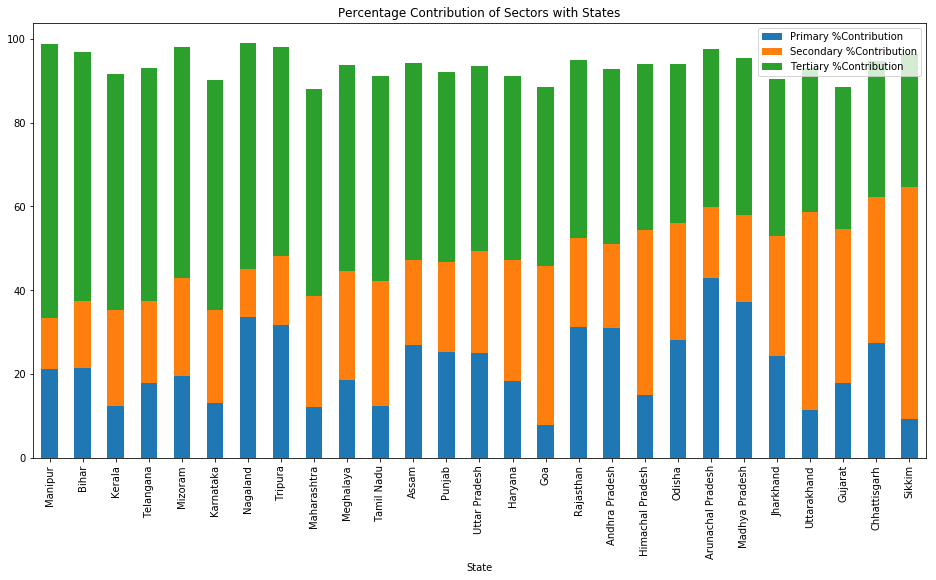

In [22]:
#Plotting all sectors contribution percentwise on one graph
gdp_sectors=gdp.sort_values(by='Tertiary %Contribution',ascending=False)
x=gdp_sectors[['Primary %Contribution','Secondary %Contribution','Tertiary %Contribution']].plot(kind='bar', stacked=True,figsize=(16,8),title='Percentage Contribution of Sectors with States')

From the above graph,

1. Arunachal Pradesh is contributing high in the primary sector as compared to the lowest Goa in that category
2. Secondary sectors are not contributing much for the overall number of States. Sikkim is the highest in this sector.
3. Tertiary sector has proven to be the highest contributor in most number of States.


For simplifying the analysis, we are categorising all States into `four` categories. Also comparing all States would become quite exhaustive.

In [23]:
#Calculating quantile values of Per Capita GSDP based on the given quantiles
gdp['Per Capita GSDP (Rs.)'].quantile(q=[0.0,0.2,0.5,0.85,1])

0.00     33954.0
0.20     65187.0
0.50    104977.0
0.85    153246.2
1.00    271793.0
Name: Per Capita GSDP (Rs.), dtype: float64

In [24]:
#Categorising States based on the above quantiles into C1,C2,C3 and C4 categories
gdp['Category']=pd.qcut(gdp['Per Capita GSDP (Rs.)'],q=[0.0,0.2,0.5,0.85,1],labels=['C4','C3','C2','C1'])

In [25]:
#Subsetting the dataframe to get only sub-sectors and total values for further analysis
gdp=gdp.iloc[:,[0,5,7,8,9,11,14,22,23,24,25,27,28,29,30,31,32,36]]
gdp.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
State,,,,,,,,,,,,,,,,,,
Maharashtra,16475655.0,5282727.0,33660294.0,4334702.0,9450211.0,15839100.0,9697246.0,16143324.0,30718051.0,5426991.0,10806363.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0,C2
Tamil Nadu,13064238.0,265536.0,18914794.0,1710379.0,12216718.0,12895842.0,7188320.0,5598498.0,16830213.0,3400800.0,7430115.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0,C2
Uttar Pradesh,25097754.0,901501.0,12261649.0,2030625.0,11256450.0,9437243.0,7404509.0,3392275.0,14548185.0,6152124.0,5034623.0,97516938.0,10107396.00,3287219.0,104337115.0,2109940.0,49450.0,C4
Karnataka,11219422.0,846882.0,12953843.0,1425762.0,6104799.0,8991658.0,5097652.0,4094169.0,24766393.0,2232584.0,5308174.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0,C2
Gujarat,13769969.0,2117218.0,24087538.0,3409983.0,5526017.0,10178713.0,4555910.0,4606644.0,5179502.0,2576195.0,3123413.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0,C2


In [26]:
#Forming new dataframe for category C1 and changing the structure
C1_category=gdp.loc[gdp.Category=='C1',:]
C1_category=C1_category.drop('Category',axis=1)
C1_category=C1_category.T
#Obtaining new column of total sub-sector contibution
C1_category['C1 Contribution']=C1_category.sum(axis=1)
#Calculating the contribution of all subsectors in percentage
C1_category['% C1 Contribution']=(C1_category['C1 Contribution'][:11]/(C1_category.iloc[14,-1]))*100
#Sorting by decreasing order to get the highest contributor at top
C1_category=C1_category.sort_values(by='% C1 Contribution',ascending=False)
#Calculating the cumulative sum of contributions 
C1_category['Cumul_sum']=C1_category['% C1 Contribution'].cumsum()

#Subsetting the top sub-sectors who contributed upto 80% of total GSDP and getting a glimpse of dataframe
C1_category=C1_category[:7]
C1_category


State,Kerala,Haryana,Goa,Sikkim,C1 Contribution,% C1 Contribution,Cumul_sum
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,407099.0,75330.0,14740245.0,14.461049,14.461049
"Agriculture, forestry and fishing",5930617.0,8015238.0,308507.0,137447.0,14391809.0,14.119213,28.580261
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,380927.0,70568.0,13995159.0,13.730076,42.310337
Manufacturing,4273567.0,7756921.0,1177608.0,550697.0,13758793.0,13.498187,55.808524
Construction,7314003.0,3702571.0,165819.0,82058.0,11264451.0,11.051090,66.859614
Other services,5728645.0,2001581.0,180431.0,149265.0,8059922.0,7.907258,74.766872
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,189656.0,47347.0,6818560.0,6.689409,81.456281


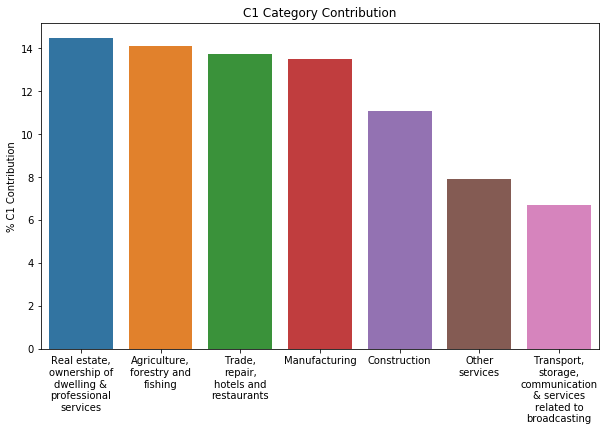

In [27]:
#Plotting the sub-sectors percentwise for C1 category
plt.figure(figsize=(10,6))
sns.barplot(x=C1_category.index,y=C1_category['% C1 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C1_category.index]
indx = np.arange(len(C1_category))
x=plt.xticks(indx,ax)
x=plt.title("C1 Category Contribution")


Top 3/4/5 sub-sectors in C1 category contributing 80% of GSDP:-

**3. Trade, repair, hotels and restaurants**

**4. Manufacturing**

**5. Construction**

In [28]:
#Following the same procedure of C1 for getting C2 category
C2_category=gdp.loc[gdp.Category=='C2',:]
C2_category=C2_category.drop('Category',axis=1)
C2_category=C2_category.T
C2_category['C2 Contribution']=C2_category.sum(axis=1)
C2_category['% C2 Contribution']=(C2_category['C2 Contribution'][:11]/(C2_category.iloc[14,-1]))*100
C2_category=C2_category.sort_values(by='% C2 Contribution',ascending=False)
C2_category['cummul_sum']=C2_category['% C2 Contribution'].cumsum()
C2_category=C2_category[:7]
C2_category

State,Maharashtra,Tamil Nadu,Karnataka,Gujarat,Telangana,Punjab,Uttarakhand,Himachal Pradesh,Arunachal Pradesh,C2 Contribution,% C2 Contribution,cummul_sum
Manufacturing,33660294.0,18914794.0,12953843.0,24087538.0,6353711.0,4790341.0,5866252.0,2543637.0,26120.0,109196530.0,18.622130,18.622130
"Real estate, ownership of dwelling & professional services",30718051.0,16830213.0,24766393.0,5179502.0,9478839.0,3142786.0,831307.0,1125937.0,48418.0,92121446.0,15.710184,34.332314
"Agriculture, forestry and fishing",16475655.0,13064238.0,11219422.0,13769969.0,7591501.0,9285716.0,1601423.0,1514981.0,686117.0,75209022.0,12.825977,47.158291
"Trade, repair, hotels and restaurants",15839100.0,12895842.0,8991658.0,10178713.0,6494607.0,4419919.0,1743106.0,615496.0,60421.0,61238862.0,10.443537,57.601828
Construction,9450211.0,12216718.0,6104799.0,5526017.0,2854024.0,2202962.0,1342733.0,808256.0,147842.0,40653562.0,6.932967,64.534795
Financial services,16143324.0,5598498.0,4094169.0,4606644.0,3023729.0,2057520.0,385030.0,362521.0,25207.0,36296642.0,6.189947,70.724742
Other services,10806363.0,7430115.0,5308174.0,3123413.0,4158229.0,3303041.0,982430.0,923164.0,218728.0,36253657.0,6.182617,76.907359


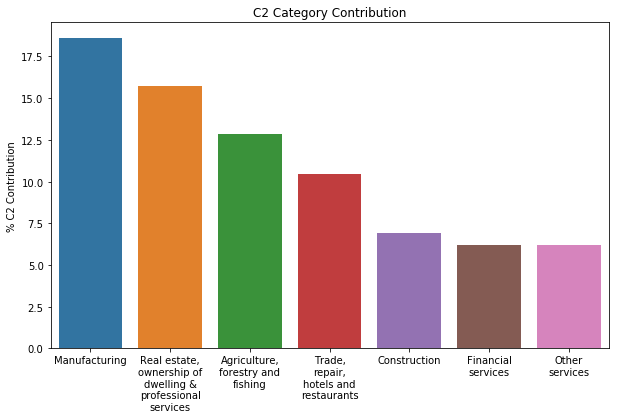

In [29]:
#Plotting the sub-sectors percentwise for C2 category

plt.figure(figsize=(10,6))
sns.barplot(x=C2_category.index,y=C2_category['% C2 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C2_category.index]
indx = np.arange(len(C2_category))
x=plt.xticks(indx,ax)
x=plt.title("C2 Category Contribution")


Top 3/4/5 sub-sectors in C2 category contributing 80% of GSDP:

**3. Agriculture, forestry and fishing**

**4. Trade, repair, hotels and restaurants**

**5. Construction**

In [30]:
#Following the same procedure of C1 for getting C3 category

C3_category=gdp.loc[gdp.Category=='C3',:]
C3_category=C3_category.drop('Category',axis=1)
C3_category=C3_category.T
C3_category['C3 Contribution']=C3_category.sum(axis=1)
C3_category['% C3 Contribution']=(C3_category['C3 Contribution'][:11]/(C3_category.iloc[14,-1]))*100
C3_category=C3_category.sort_values(by='% C3 Contribution',ascending=False)
C3_category['cummul_sum']=C3_category['% C3 Contribution'].cumsum()
C3_category=C3_category[:7]
C3_category

State,Rajasthan,Andhra Pradesh,Odisha,Chhattisgarh,Tripura,Meghalaya,Nagaland,Mizoram,C3 Contribution,% C3 Contribution,cummul_sum
"Agriculture, forestry and fishing",15044394.0,14819416.0,6422978.0,3948847.0,799825.0,366521.0,607897.0,217010.0,42226888.0,23.727451,23.727451
Manufacturing,6552580.0,4672266.0,5754229.0,4370593.0,228625.0,433213.0,18346.0,8479.0,22038331.0,12.383423,36.110875
"Trade, repair, hotels and restaurants",7297290.0,4233400.0,3149555.0,1535571.0,390423.0,383974.0,140781.0,114315.0,17245309.0,9.690206,45.801080
"Real estate, ownership of dwelling & professional services",6451997.0,4405409.0,2348714.0,2462166.0,190704.0,150409.0,159651.0,55068.0,16224118.0,9.116395,54.917475
Construction,5353326.0,4664889.0,2402396.0,2669855.0,177899.0,150256.0,156072.0,133228.0,15707921.0,8.826341,63.743816
Other services,4164287.0,4215389.0,2340603.0,1112232.0,323287.0,214211.0,259186.0,186222.0,12815417.0,7.201032,70.944849
"Transport, storage, communication & services related to broadcasting",3814461.0,5076984.0,2034016.0,871770.0,155956.0,148189.0,77521.0,52587.0,12231484.0,6.872918,77.817767


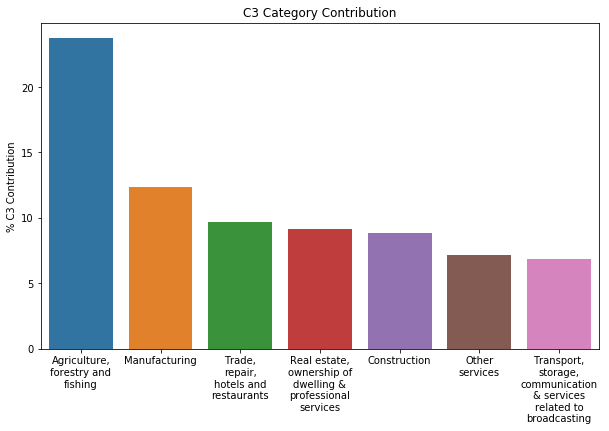

In [31]:
#Plotting the sub-sectors percentwise for C3 category

plt.figure(figsize=(10,6))
sns.barplot(x=C3_category.index,y=C3_category['% C3 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C3_category.index]
indx = np.arange(len(C3_category))
x=plt.xticks(indx,ax)
x=plt.title("C3 Category Contribution")


Top 3/4/5 sub-sectors in C3 category contributing 80% of GSDP:

**3. Trade, repair, hotels and restaurants**

**4. Real estate, ownership of dwelling & professional services**

**5. Construction**

In [32]:
#Following the same procedure of C1 for getting C4 category

C4_category=gdp.loc[gdp.Category=='C4',:]
C4_category=C4_category.drop('Category',axis=1)
C4_category=C4_category.T
C4_category['C4 Contribution']=C4_category.sum(axis=1)
C4_category['% C4 Contribution']=(C4_category['C4 Contribution'][:11]/(C4_category.iloc[14,-1]))*100
C4_category=C4_category.sort_values(by='% C4 Contribution',ascending=False)
C4_category['cummul_sum']=C4_category['% C4 Contribution'].cumsum()
C4_category=C4_category[:7]
C4_category

State,Uttar Pradesh,Madhya Pradesh,Bihar,Jharkhand,Assam,Manipur,C4 Contribution,% C4 Contribution,cummul_sum
"Agriculture, forestry and fishing",25097754.0,16235647.0,7951890.0,3211065.0,3855548.0,383140.0,56735044.0,24.323490,24.323490
"Trade, repair, hotels and restaurants",9437243.0,5357515.0,7448373.0,1991359.0,2987155.0,262950.0,27484595.0,11.783216,36.106707
Manufacturing,12261649.0,4368833.0,2189965.0,4114148.0,2002936.0,49501.0,24987032.0,10.712459,46.819166
"Real estate, ownership of dwelling & professional services",14548185.0,2660123.0,3740641.0,1656784.0,1412466.0,159335.0,24177534.0,10.365410,57.184576
Construction,11256450.0,4403151.0,3449763.0,1789834.0,1733568.0,143182.0,22775948.0,9.764521,66.949097
"Transport, storage, communication & services related to broadcasting",7404509.0,2865802.0,3147173.0,1470022.0,1194568.0,109726.0,16191800.0,6.941761,73.890858
Other services,5034623.0,2747805.0,4587589.0,1375410.0,1795658.0,317930.0,15859015.0,6.799089,80.689947


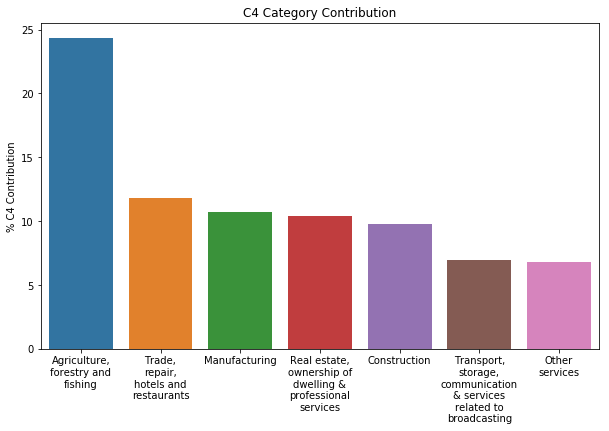

In [33]:
#Plotting the sub-sectors percentwise for C4 category
plt.figure(figsize=(10,6))
sns.barplot(x=C4_category.index,y=C4_category['% C4 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C4_category.index]
indx = np.arange(len(C4_category))
x=plt.xticks(indx,ax)
x=plt.title("C4 Category Contribution")


Top 3/4/5 sub-sectors in C4 category contributing 80% of GSDP:

**3. Manufacturing**

**4. Real estate, ownership of dwelling & professional services**

**5. Construction**

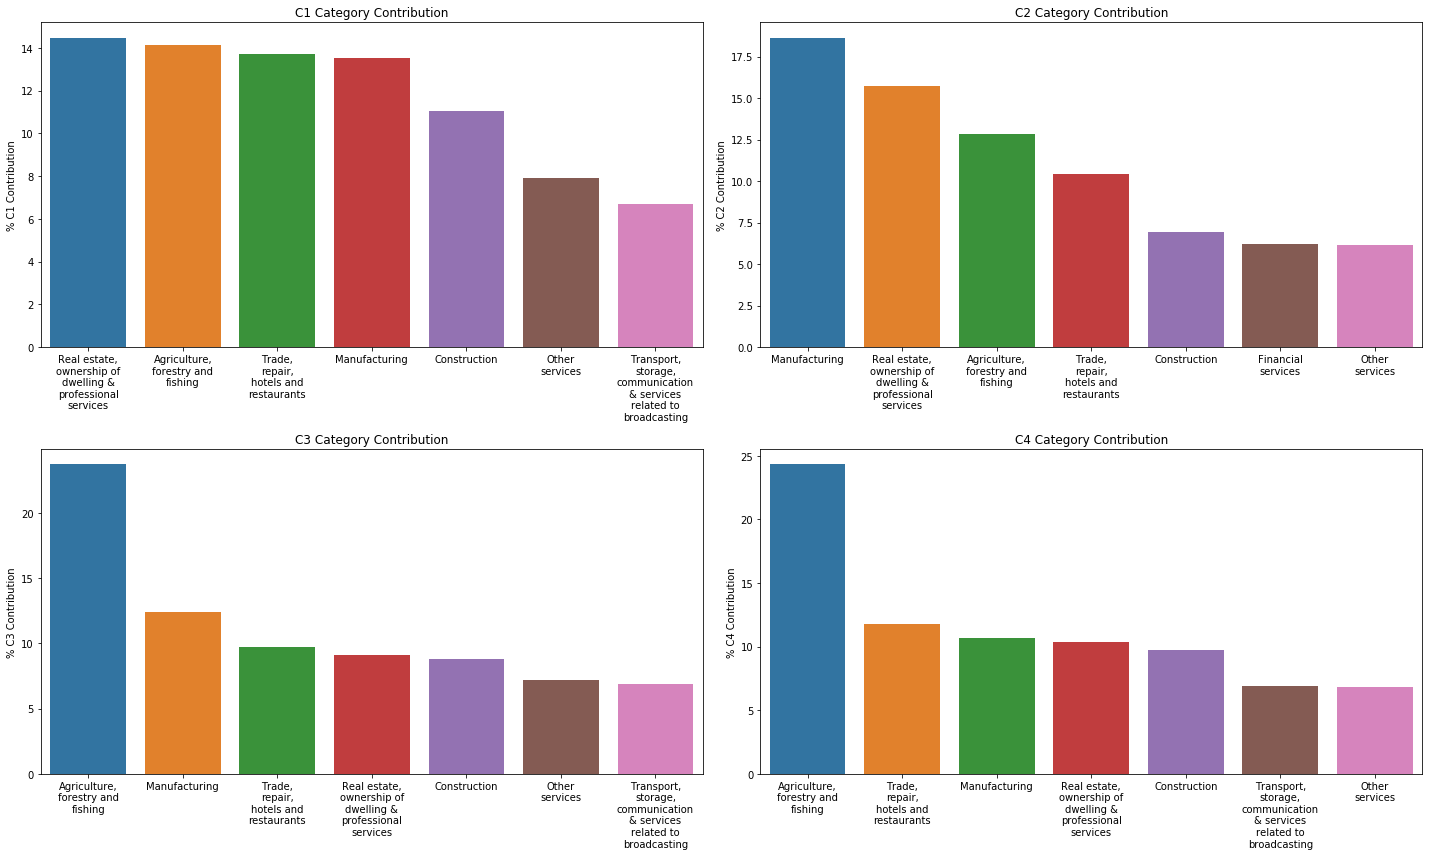

In [34]:
#Plotting all categories in one figure for better visualisation

# adjust figure size
plt.figure(figsize=(20,12))

# subplot 1: C1 Category
plt.subplot(2, 2, 1)
sns.barplot(x=C1_category.index,y=C1_category['% C1 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C1_category.index]
indx = np.arange(len(C1_category))
plt.xticks(indx,ax)
plt.title("C1 Category Contribution")

# subplot 1: C2 Category
plt.subplot(2, 2, 2)
sns.barplot(x=C2_category.index,y=C2_category['% C2 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C2_category.index]
indx = np.arange(len(C2_category))
plt.xticks(indx,ax)
plt.title("C2 Category Contribution")

# subplot 1: C3 Category
plt.subplot(2, 2, 3)
sns.barplot(x=C3_category.index,y=C3_category['% C3 Contribution'])
ax=['\n'.join(wrap(word,13)) for word in C3_category.index]
indx = np.arange(len(C3_category))
plt.xticks(indx,ax)
plt.title("C3 Category Contribution")

# subplot 1: C4 Category
plt.subplot(2, 2, 4)
sns.barplot(x=C4_category.index,y=C4_category['% C4 Contribution'])
plt.title("C4 Category Contribution")
ax=['\n'.join(wrap(word,13)) for word in C4_category.index]
indx = np.arange(len(C4_category))
x=plt.xticks(indx,ax)

plt.tight_layout()


Now that we have plotted all the categories, let's get some understanding from the plots:-

- There is no sub-sector in C1 category with highest contribution as compared to other categories.
- C1 category is on the topside because all sub-sectors are contributing for the overall gain in the contribution
- 'Agriculture,forestry and fishing' is in the top 3 contributors list in all categories. This sub-sector is the highest contributor for C3 and C4 category.
- Categorywise sub-sectors in the top 3rd, 4th and 5th position should be focussed in all categories as these sub-sectors together can push the overall GDP to the highest

#### Recommendations:-

1. C1 category:-
    - This category is doing great in all sub-sectors but sub-sectors like **Other services** and **Transport, storage, communication & services related to broadcasting** can add more contribution.
    - The top sub-sectors must aim for more than 20% contribution.

2. C2 Category:-
    - States belonging to this category must emphasize to get more contribution from **Construction** and **Financial Services** as these sub-sectors may add high revenue in the total GDP
    - **Agriculture,forestry and fishing**  sub-sector should get more than 25% contribution as all States have most agricultural lands compared to other States
    
3. C3 Category:-
    - Except **Agriculture,forestry and fishing**, all sub-sectors need to aim for more than 15% contribution
    - States belonging to this category should encourage **Manufacturing** as this sub-sector may increase contribution in the following sub-sectors like **Real estate, ownership of dwelling & professional services** and **Trade, repair, hotels and restaurants**
    
4. C4 Category:-
    - This category should follow the same points discussed in the above C3 category.
    - Also Governments in this category should promote more development in the infrastructure and people awareness.

# Part-II: GDP and Education Dropout Rates



In this part we are investigating the relatinship between per capita GDP with dropout rates in education.

In [35]:
# set a seaborn style of your taste
sns.set(style="whitegrid")
#Reading the dataset and considering some implications from the dataset
edr=pd.read_csv("rs_session243_au570_1.1.csv")
edr=edr.rename(columns={'Primary - 2014-2015':'Primary - 2013-2014'})
edr=edr.rename(columns={'Primary - 2014-2015.1':'Primary - 2014-2015'})
edr=edr.rename(columns={'Level of Education - State':'State'})
#Subsetting the dataframe for the year 2014-15
edr=edr.iloc[:,[1,4,7,10]]
edr=edr.set_index('State')
edr.head()

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,
A & N Islands,0.51,1.69,9.87
Andhra Pradesh,6.72,5.20,15.71
Arunachal Pradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Bihar,NaN,4.08,25.90


In [36]:
#Merging the previous dataframe with dropout dataframe
gdp=pd.merge(gdp,edr,how='left',left_index=True,right_index=True)
gdp=gdp.sort_values('Per Capita GSDP (Rs.)',ascending=False)
gdp=gdp.reset_index()
gdp=gdp[['State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Per Capita GSDP (Rs.)']]
gdp.head()

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
0,Goa,0.73,0.07,11.15,271793.0
1,Sikkim,2.27,1.57,15.89,240274.0
2,Haryana,5.61,5.81,15.89,164077.0
3,Kerala,NaN,NaN,12.32,154778.0
4,Uttarakhand,NaN,NaN,NaN,153076.0


In [37]:
#Getting the correlation matrix
gdp.corr()

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
Primary - 2014-2015,1.000000,0.648542,0.167977,-0.574049
Upper Primary - 2014-2015,0.648542,1.000000,0.515896,-0.524320
Secondary - 2014-2015,0.167977,0.515896,1.000000,-0.446081
Per Capita GSDP (Rs.),-0.574049,-0.524320,-0.446081,1.000000


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


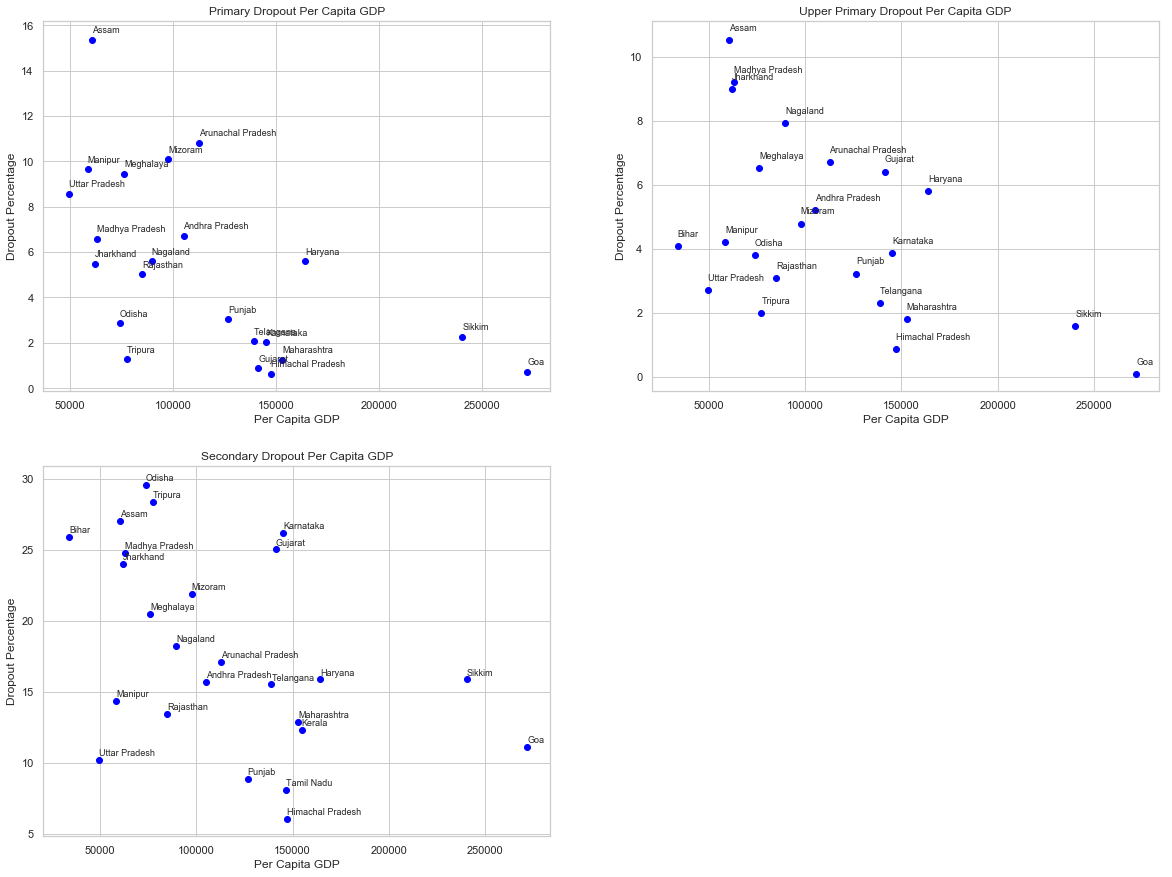

<Figure size 432x288 with 0 Axes>

In [38]:
#adjusting figue size
x=plt.figure(figsize=(20,15))

# subplot 1: Primary Dropout
plt.subplot(2, 2, 1)
for i,type in enumerate(list(gdp['State'])):
    x = gdp['Per Capita GSDP (Rs.)'][i]
    y = gdp['Primary - 2014-2015'][i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.title("Primary Dropout Per Capita GDP")
    plt.ylabel("Dropout Percentage")
    plt.xlabel("Per Capita GDP")

# subplot 2: Upper Primary Dropout
plt.subplot(2, 2, 2)
for i,type in enumerate(list(gdp['State'])):
    x = gdp['Per Capita GSDP (Rs.)'][i]
    y = gdp['Upper Primary - 2014-2015'][i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.title("Upper Primary Dropout Per Capita GDP")
    plt.ylabel("Dropout Percentage")
    plt.xlabel("Per Capita GDP")
    
# subplot 3: Secondary Dropout
plt.subplot(2, 2, 3)
for i,type in enumerate(list(gdp['State'])):
    x = gdp['Per Capita GSDP (Rs.)'][i]
    y = gdp['Secondary - 2014-2015'][i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.title("Secondary Dropout Per Capita GDP")
    plt.ylabel("Dropout Percentage")
    plt.xlabel("Per Capita GDP")
    
plt.show()
x=plt.tight_layout()


#Please ignore the below warning and refer the graph

### Possible Hypothesis:

- It is observed that all the dropout rates are negatively correlated with the Per Capita GDP
- The possible reason could be the low per capita income may lead to poor educational facilities.
- Also the other hypothesis can be the dropouts(people) may come from low income families and have to search for jobs or business at an early age. However, this low income is due to the low GDP of the State.
- And vice versa, states with low drop out rates have employable skilled people which leads to high income per capita and high per capita GDP contribution.